In [1]:
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join as oj

In [2]:
data_dir = '/scratch/users/vision/data/cosmo/UrbanSound8K'
out_dir = '/scratch/users/vision/data/cosmo/audio_models'
results = pkl.load(open(oj(out_dir, 'audio_ig_correct.pkl'), 'rb'))

csv_path = oj(data_dir, 'metadata/UrbanSound8K.csv')
csvData = pd.read_csv(oj(data_dir, 'metadata/UrbanSound8K.csv'))
class_dict = {k: csvData[csvData.classID==k].iloc[0]['class'].replace('_', ' ') for k in range(10)}
class_dict

{0: 'air conditioner',
 1: 'car horn',
 2: 'children playing',
 3: 'dog bark',
 4: 'drilling',
 5: 'engine idling',
 6: 'gun shot',
 7: 'jackhammer',
 8: 'siren',
 9: 'street music'}

In [44]:
out = np.zeros((10, 16001))
for i in range(10):
    out[i] = np.fft.ifftshift(np.array(results[i]).mean(axis=0))
out = out[:, :16000] # drop the last column
# plt.plot()

The audio is downsampled to 8kHz. Each example has 32,000 samples. Before saving, we call fftshift (in `util.to_freq`).

In [45]:
freqs = np.fft.fftfreq(n=32000, d=1/8000)[:16000]

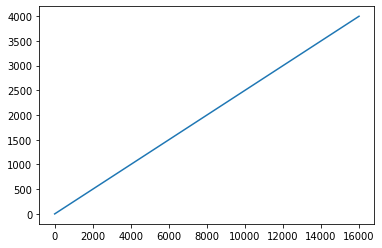

In [46]:
plt.plot(freqs)

In [ ]:
R, C = 10, 1
fig = plt.figure(dpi=200, figsize=(6, 9))
vmax = np.max(out)
vmin = np.min(out)
for r in range(R):
    ax = plt.subplot(R, C, r + 1)
    plt.plot(freqs, out[r])
    ax.patch.set_visible(False)
#     plt.title(class_dict[r], loc='right', verticalalignment='top')
    ax.text(0.95, 0.5, class_dict[r], transform=ax.transAxes, ha='right')
   
    if r < R - 1:
        plt.axis('off')
    else:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.xlabel('Frequency (Hz)', fontsize=13)
fig.text(0.04, 0.5, 'Importance (Integrated gradients)', va='center', rotation='vertical', fontsize=13)
plt.subplots_adjust(hspace=0)
plt.savefig('fig_audio.pdf')
# plt.tight_layout()
plt.show()
#         plt.axis('off')
#     plt.ylim((vmin, vmax))
#     plt.yscale('log')